<a href="https://colab.research.google.com/github/qTronor/AI-Model-Playground/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D1%81%D0%BE_%D1%81%D0%BB%D0%BE%D1%8F%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 37.4 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: keras
    Found existing installation: kera

In [3]:
!pip install keras==2.11.0

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

In [14]:
print(x_train.shape)
print(x_val.shape)
print (y_train[:10])
print (y_val[:10])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


In [15]:
x_train_flat = x_train.reshape(-1, 28*28).astype(float) # Преобразуем тренировочные данные в векторы
print(x_train.shape, x_train_flat.shape) # Выводим формы оригинального и преобразованного массива

x_val_flat = x_val.reshape(-1, 28*28).astype(float)
print(x_val.shape, x_val_flat.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


In [16]:
x_train_float = x_train_flat.astype(float) / 255 - 0.5
x_val_float = x_val_flat.astype(float) / 255 - 0.5

In [17]:
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

In [18]:
print(y_train_oh.shape) # Выводим форму one-hot закодированных меток
print(y_train_oh[:5], y_train[:5]) # Выводим первые 5 one-hot меток и соответствующие оригинальные метки для проверки

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [5 0 4 1 9]


# Сеть без скрытых слоев

In [19]:
model = Sequential()

In [20]:
model.add(Dense(256, activation='relu', input_shape=(x_train_float.shape[1],)))
model.add(Dense(10, activation='softmax',))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [23]:
history = model.fit(
                    x_train_float,
                    y_train_oh,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_val_float, y_val_oh)
                    )

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3400 - accuracy: 0.8990 - val_loss: 0.1851 - val_accuracy: 0.9425
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1628 - accuracy: 0.9519 - val_loss: 0.1286 - val_accuracy: 0.9620
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1170 - accuracy: 0.9643 - val_loss: 0.1044 - val_accuracy: 0.9684
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.1139 - val_accuracy: 0.9659
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0790 - accuracy: 0.9757 - val_loss: 0.0829 - val_accuracy: 0.9748
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0693 - accuracy: 0.9781 - val_loss: 0.0893 - val_accuracy: 0.9716
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0598 - accuracy: 0.9808 - val_loss: 0.0807 - val_accuracy: 0.9732
Epoch 

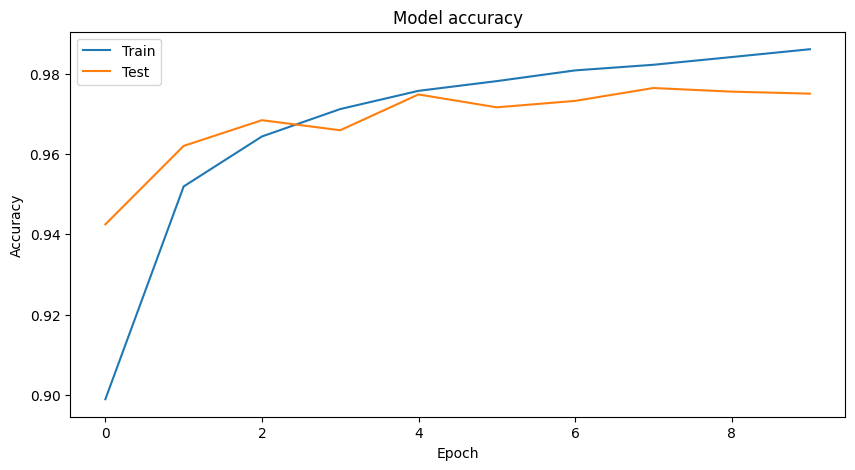

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

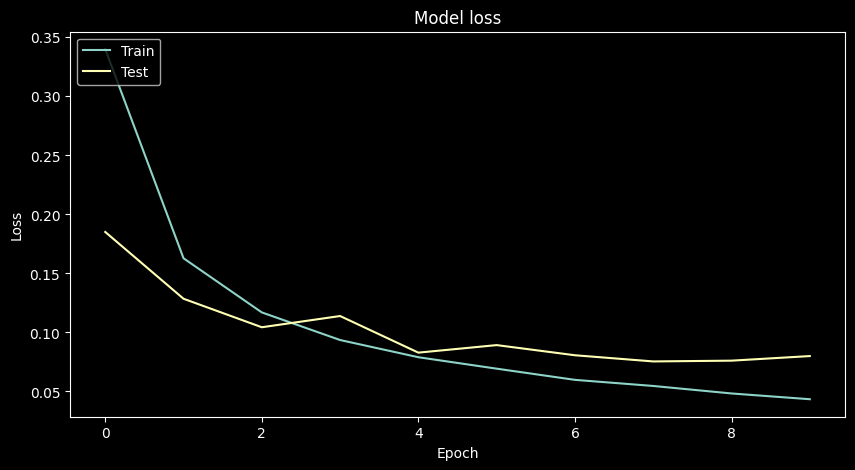

In [25]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model.predict(x_val_float)

313/313 [==============================] - 1s 2ms/step


array([[2.49942067e-10, 1.22180363e-10, 2.73825890e-07, ...,
        9.99991119e-01, 5.81983461e-10, 1.25556096e-06],
       [6.10758555e-10, 6.86932844e-06, 9.99993026e-01, ...,
        8.98205935e-15, 1.66963265e-09, 5.43043940e-17],
       [2.15754383e-08, 9.99859095e-01, 6.17942205e-05, ...,
        4.22290286e-05, 1.06470825e-05, 2.71315662e-06],
       ...,
       [3.64947805e-14, 2.36929356e-12, 2.51454912e-12, ...,
        7.77571163e-09, 2.73622969e-09, 4.95644940e-07],
       [3.90914948e-07, 2.45403031e-10, 1.06758147e-09, ...,
        2.23094501e-10, 1.12806847e-05, 2.47542820e-11],
       [2.07934406e-07, 1.24789082e-10, 1.20477610e-08, ...,
        3.15666627e-15, 2.14865083e-12, 1.03261233e-09]], dtype=float32)

In [27]:
np.argmax(model.predict(x_val_float), axis = 1)

313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [28]:
model.predict(x_val_float)[0]

313/313 [==============================] - 1s 2ms/step


array([2.4994207e-10, 1.2218036e-10, 2.7382589e-07, 7.3029041e-06,
       5.8515225e-14, 8.0223508e-09, 2.6717160e-17, 9.9999112e-01,
       5.8198346e-10, 1.2555610e-06], dtype=float32)

In [29]:
predicts = np.argmax(model.predict(x_val_float), axis = 1)

print('Test Accuracy: ', accuracy_score(y_val, predicts))

313/313 [==============================] - 1s 3ms/step
Test Accuracy:  0.975


# Модель с двумя скрытыми слоями

In [30]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(x_train_float.shape[1],)))

model.add(Dense(128, activation='relu',))
model.add(Dense(128, activation='relu',))

model.add(Dense(10, activation='softmax',))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 251,658
Trainable params: 251,658
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [33]:
history = model.fit(
                    x_train_float,
                    y_train_oh,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_val_float, y_val_oh)
                    )

Epoch 1/10
938/938 [==============================] - 10s 9ms/step - loss: 0.3028 - accuracy: 0.9064 - val_loss: 0.1701 - val_accuracy: 0.9457
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1433 - accuracy: 0.9558 - val_loss: 0.1525 - val_accuracy: 0.9506
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1117 - accuracy: 0.9649 - val_loss: 0.0976 - val_accuracy: 0.9688
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0904 - accuracy: 0.9712 - val_loss: 0.0998 - val_accuracy: 0.9707
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0789 - accuracy: 0.9749 - val_loss: 0.1124 - val_accuracy: 0.9671
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0681 - accuracy: 0.9780 - val_loss: 0.1031 - val_accuracy: 0.9702
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0604 - accuracy: 0.9800 - val_loss: 0.1073 - val_accuracy: 0.9694
Epoch

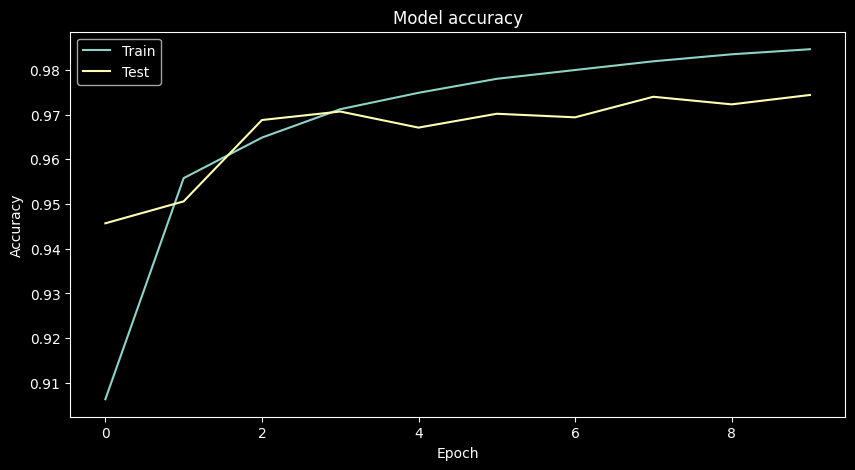

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

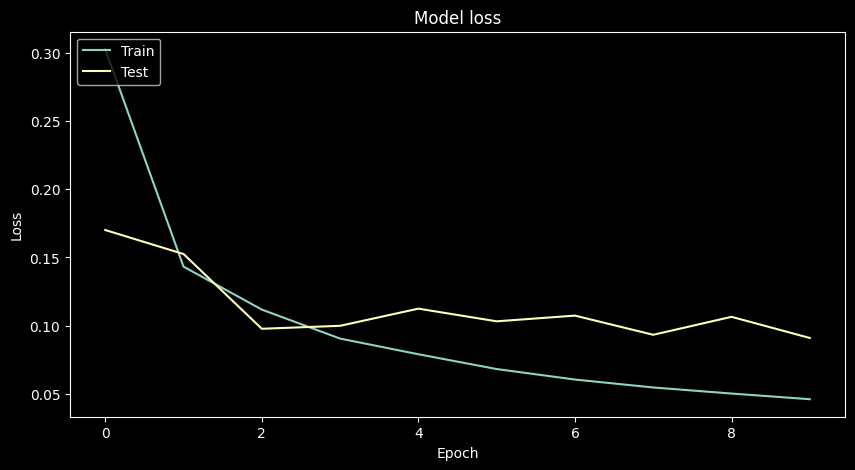

In [35]:
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
predicts = np.argmax(model.predict(x_val_float), axis = 1)

print('Test Accuracy: ', accuracy_score(y_val, predicts))

313/313 [==============================] - 1s 2ms/step
Test Accuracy:  0.9744


MNIST — относительно простой датасет, поэтому нейронная сеть с 256 входами и 10 выходами достаточно сильна и добавление новых слоев не принесет хорошего результата